# Labeling&Annotation

In [1]:
import scanpy as sc, numpy as np, pandas as pd
import scvi

Global seed set to 0


In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
from matplotlib.pyplot import rc_context
from matplotlib import pyplot as plt

## Annotation

In [5]:
adata= sc.read ("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221217.adata.e13_pd4.scviintegrated.hvg5500.seed16.min_dist0.4.gene1000.mt7.5.h5ad")

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [6]:
new_cluster_names = [
    'BK-1', 'emFIB-2', 'FIB-1', 'FIB-2', 'emFIB-3', 'FIB-3', 'emFIB-1', 'BK-2', 'FIB-4', 'emBK', 'DC/DP', 'DP', 'HFKC-1', 'HFKC-2', 'SBK-1', 'HFKC-3', 'Mast cells', 'Macrophage-1', 'Muscle cells', 'emFIB-4', 'Pericytes', 'emSBK', 'Schwann cells', 'Melanocytes', 'Lymphocytes', 'DS-2', 'DS-1', 'Vas-1', 'Macrophage-2', 'APM', 'HFKC-4', 'Vas-2', 'Neutrophils', 'SBK-2', 'Merkel cells'
    ]
adata.rename_categories('sub_cluster', new_cluster_names)

/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


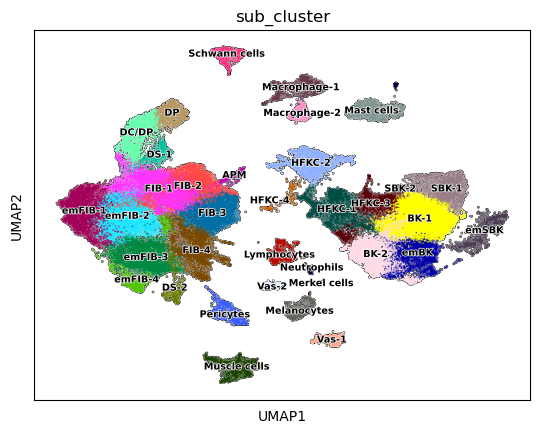

In [7]:
sc.pl.umap(adata, color='sub_cluster', add_outline=True, size=5, legend_loc='on data', legend_fontoutline=1, legend_fontsize='x-small')

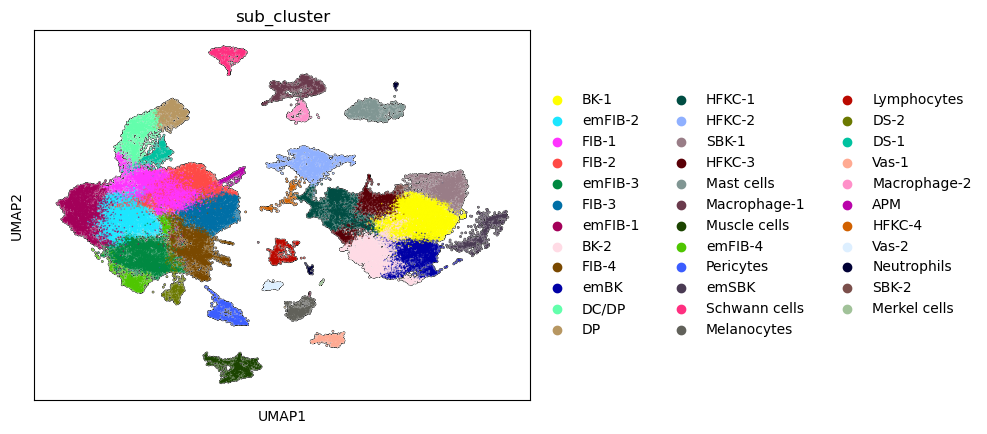

In [8]:
sc.pl.umap(adata, color='sub_cluster', add_outline=True, size=5)

In [9]:
#adata.write("221219.adata.e13_pd4.scviintegrated.LABELED.hvg5500.seed16.min_dist0.4.gene1000.mt7.5.h5ad")

## Known marker time plot

In [49]:
def cluster_gene_multiples_normalized(
    adata, gene, size=20, **kwargs
):
    
    fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(30, 4))
    sc.pl.umap(adata[adata.obs["bulk.ident"] == "E13.5"], size=20, color=[gene], frameon=True, show=False, ax=axes[0], title="E13.5", layer = 'scvi_normalized')
    sc.pl.umap(adata[adata.obs["bulk.ident"] == "E14.5"], size=20, color=[gene], frameon=True, show=False, ax=axes[1], title="E14.5", layer = 'scvi_normalized')
    sc.pl.umap(adata[adata.obs["bulk.ident"] == "E16.5"], size=20, color=[gene], frameon=True, show=False, ax=axes[2], title="E16.5", layer = 'scvi_normalized')
    sc.pl.umap(adata[adata.obs["bulk.ident"] == "PD0"], size=20, color=[gene], frameon=True, show=False, ax=axes[3], title="PD0", layer = 'scvi_normalized')
    sc.pl.umap(adata[adata.obs["bulk.ident"] == "PD2"], size=20, color=[gene], frameon=True, show=False, ax=axes[4], title="PD2", layer = 'scvi_normalized')
    sc.pl.umap(adata[adata.obs["bulk.ident"] == "PD4"], size=20, color=[gene], frameon=True, show=False, ax=axes[5], title="PD4", layer = 'scvi_normalized')

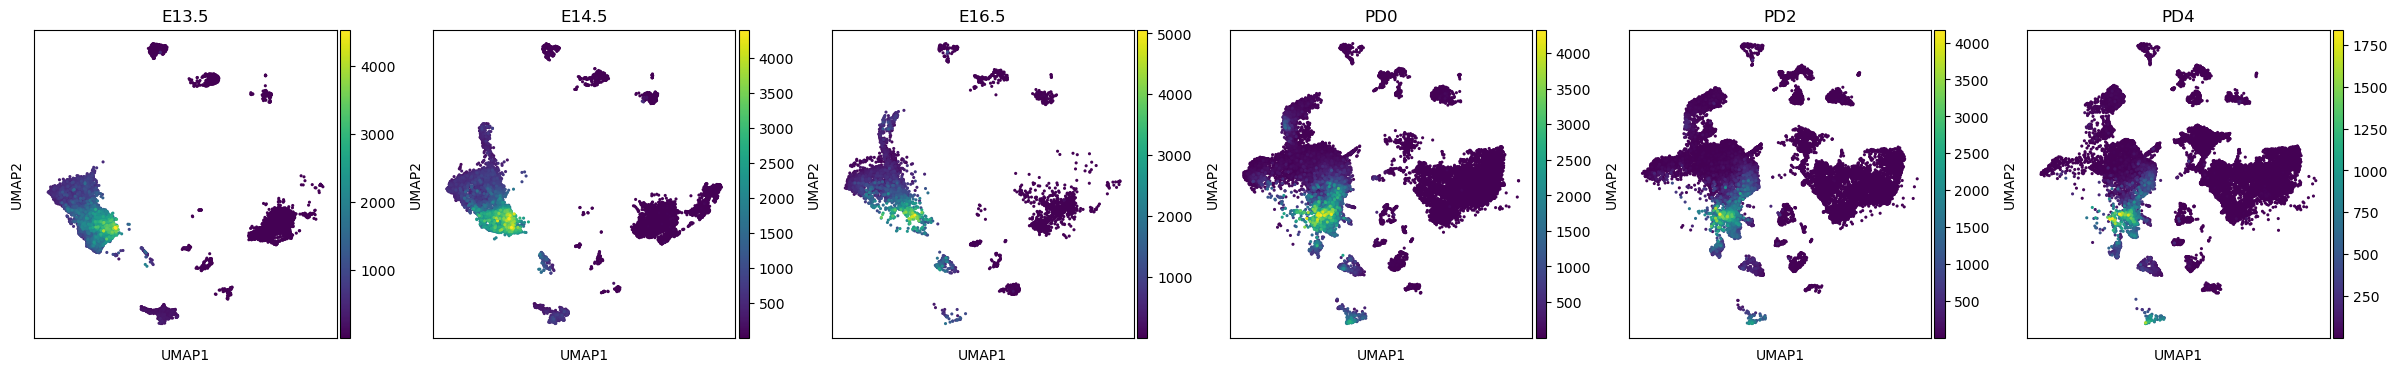

In [50]:
cluster_gene_multiples_normalized(adata, "Dlk1")

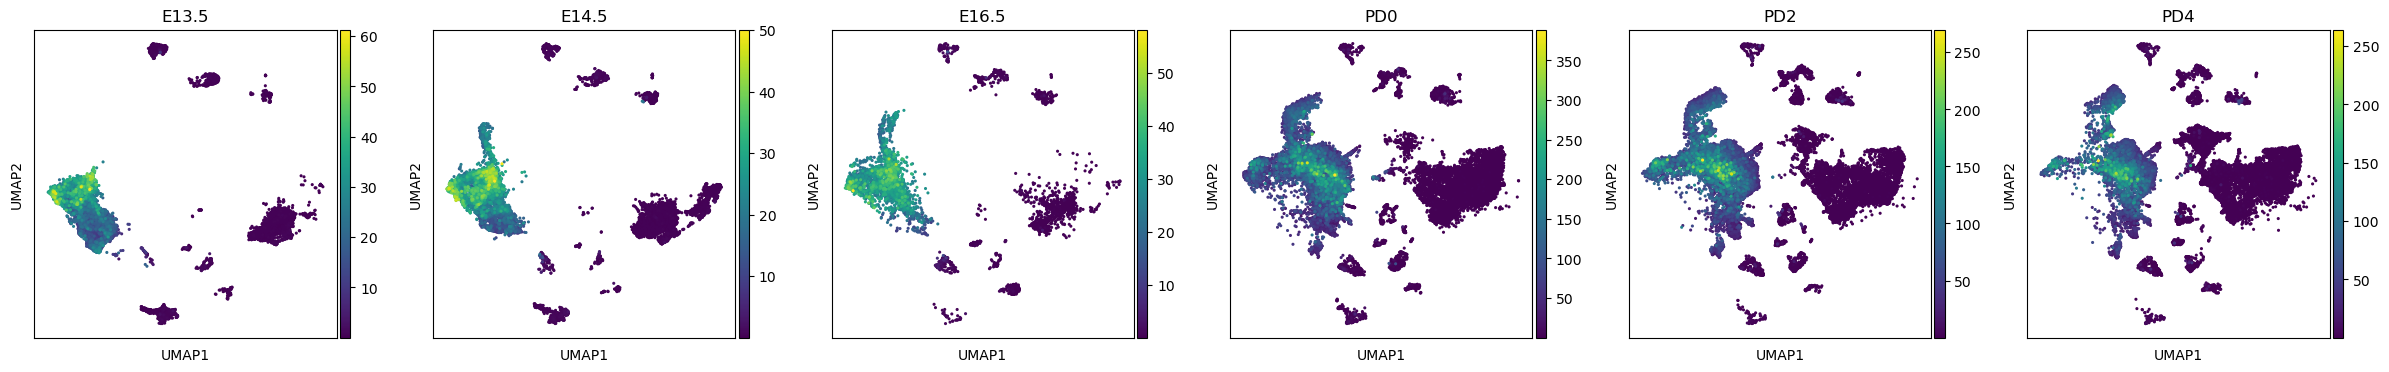

In [51]:
cluster_gene_multiples_normalized(adata, "Pdgfra")

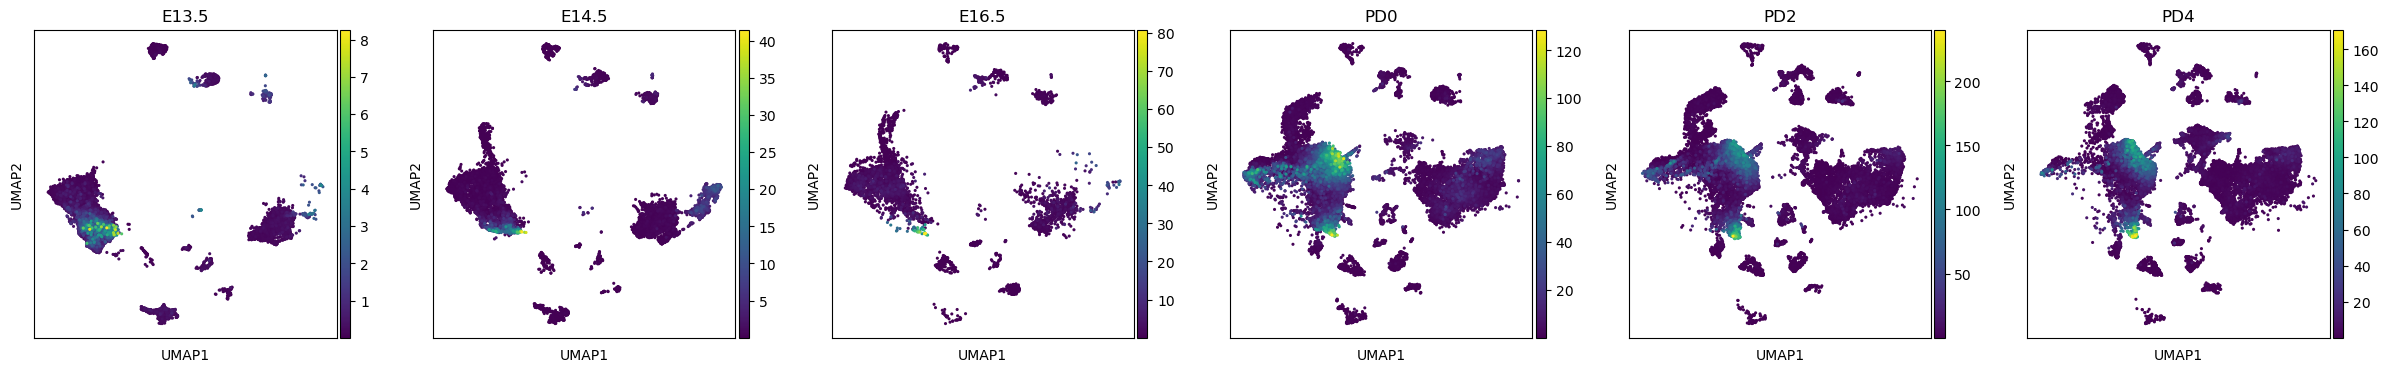

In [52]:
cluster_gene_multiples_normalized(adata, "Dpp4")

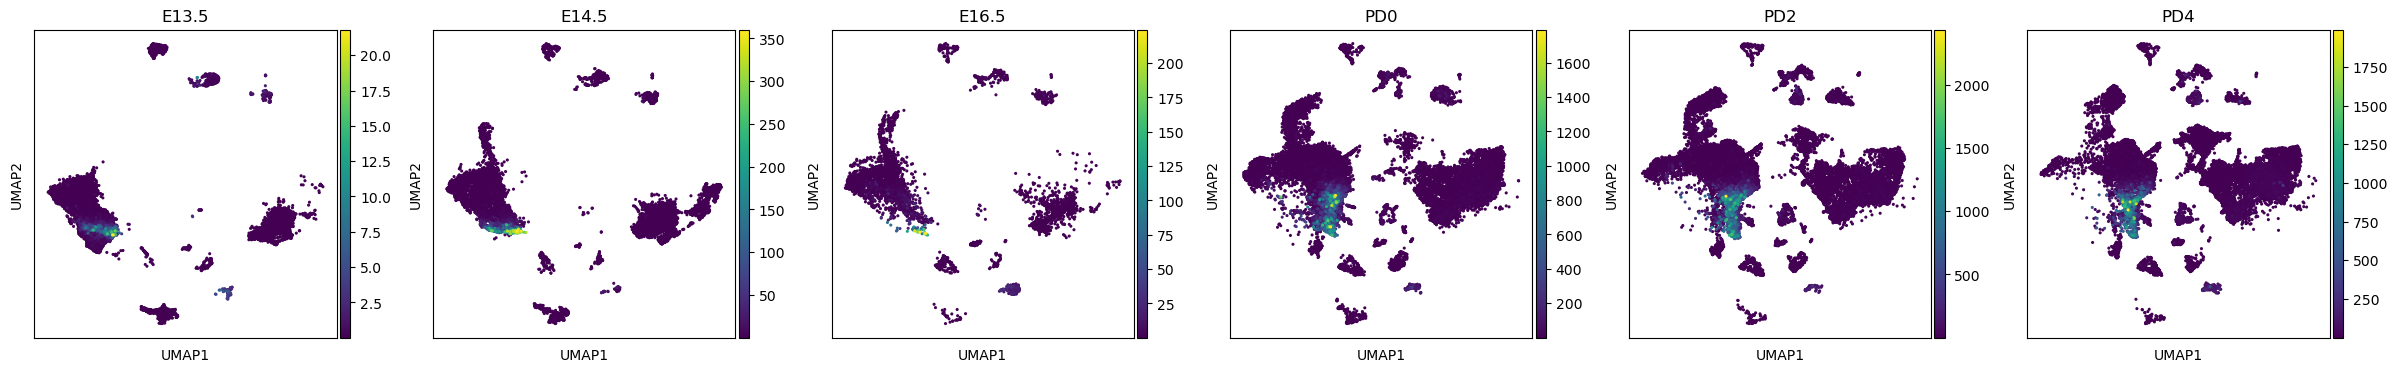

In [53]:
cluster_gene_multiples_normalized(adata, "Ly6a")

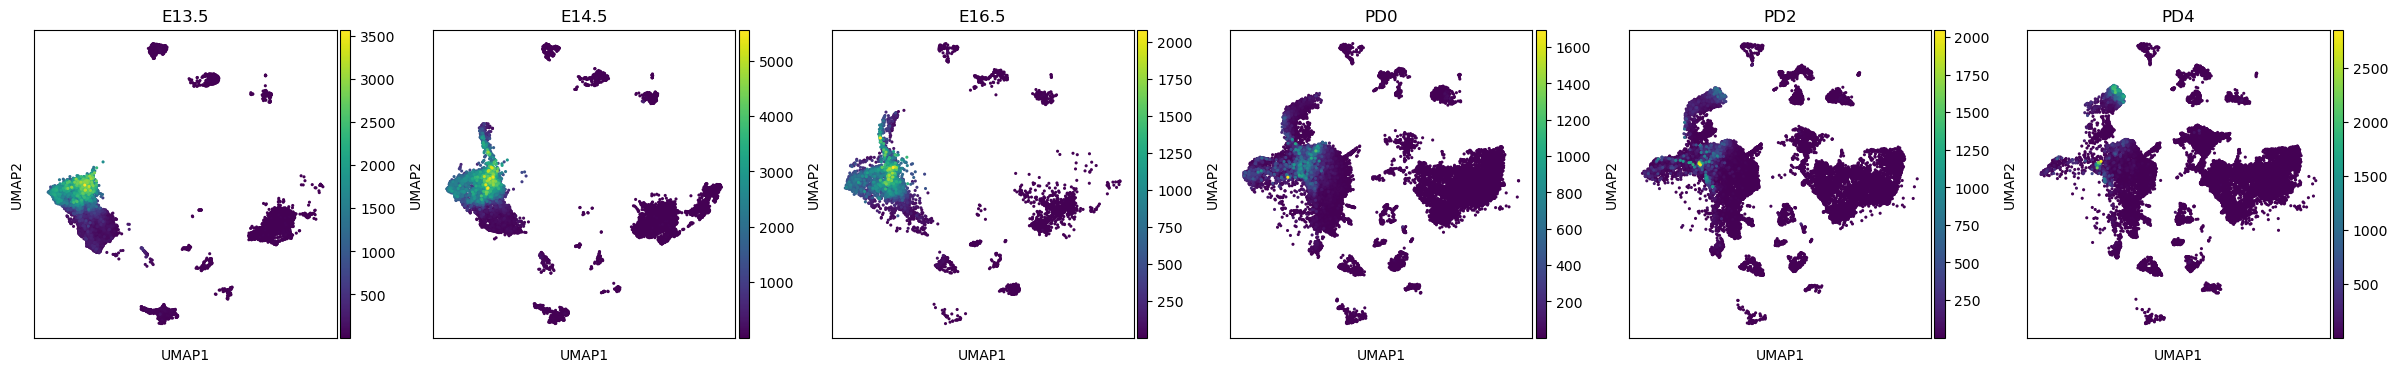

In [58]:
cluster_gene_multiples_normalized(adata, "Crabp1")

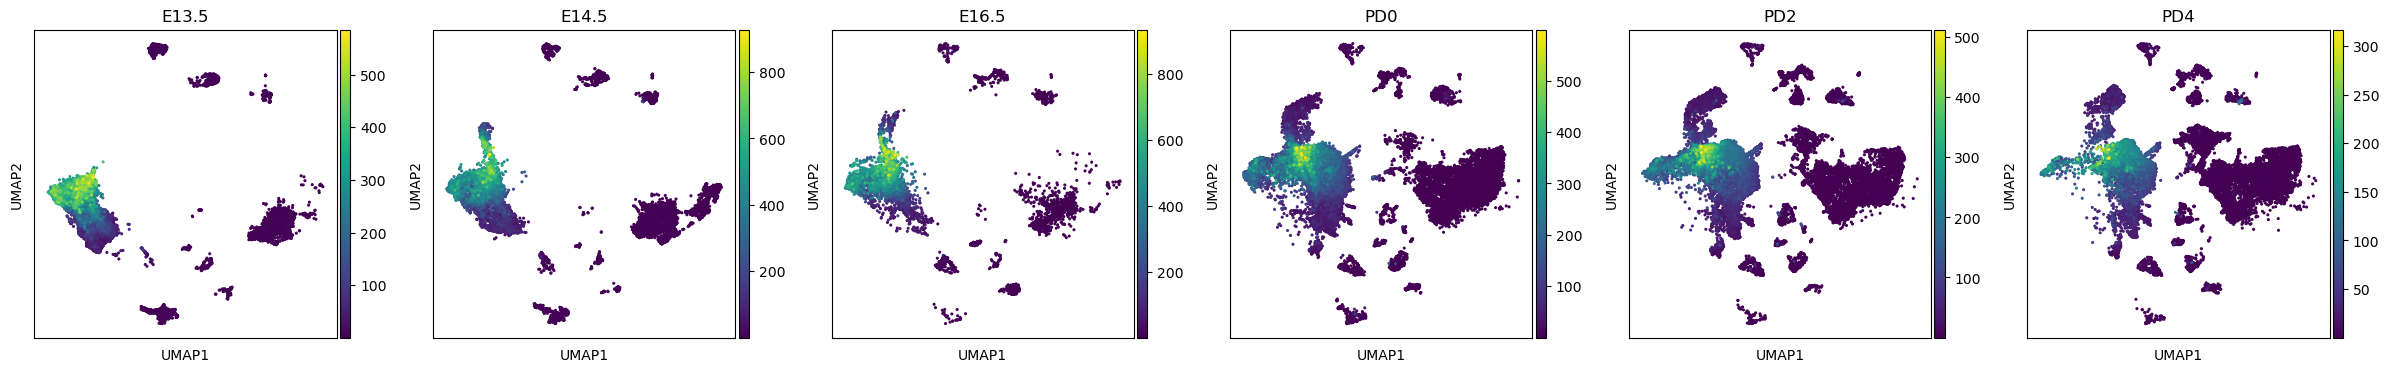

In [59]:
cluster_gene_multiples_normalized(adata, "Twist2")

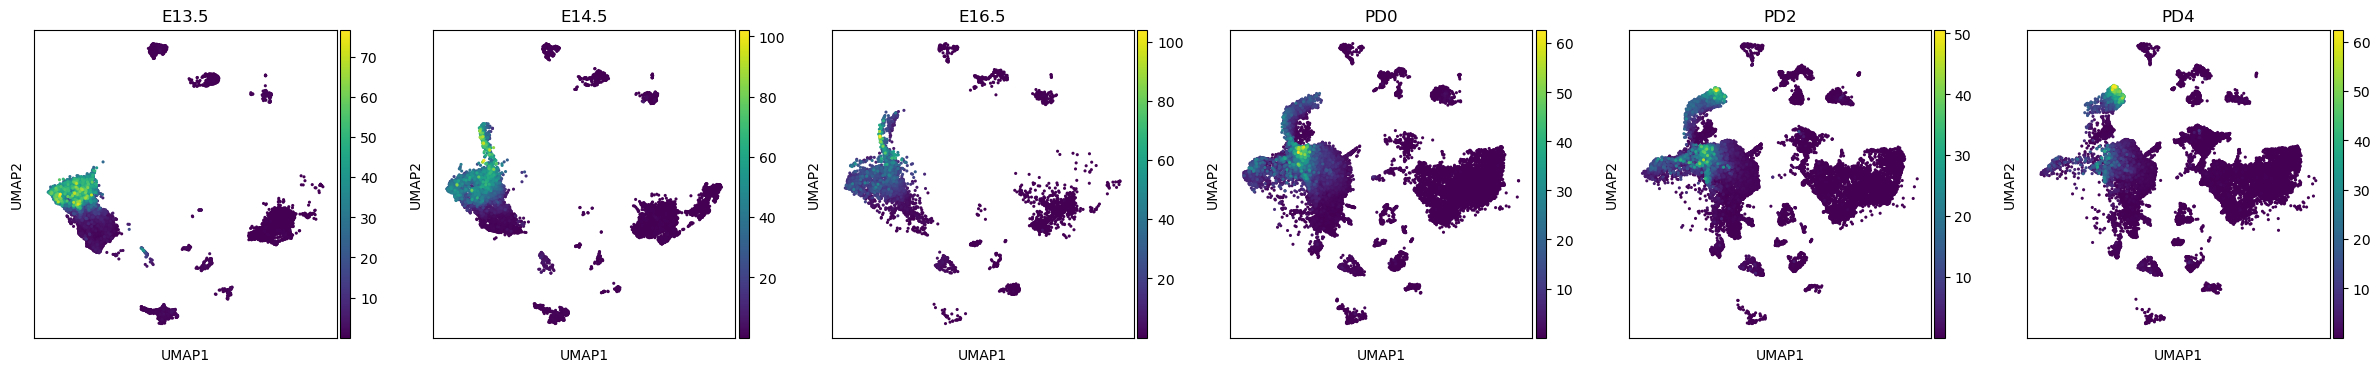

In [60]:
cluster_gene_multiples_normalized(adata, "Apela")

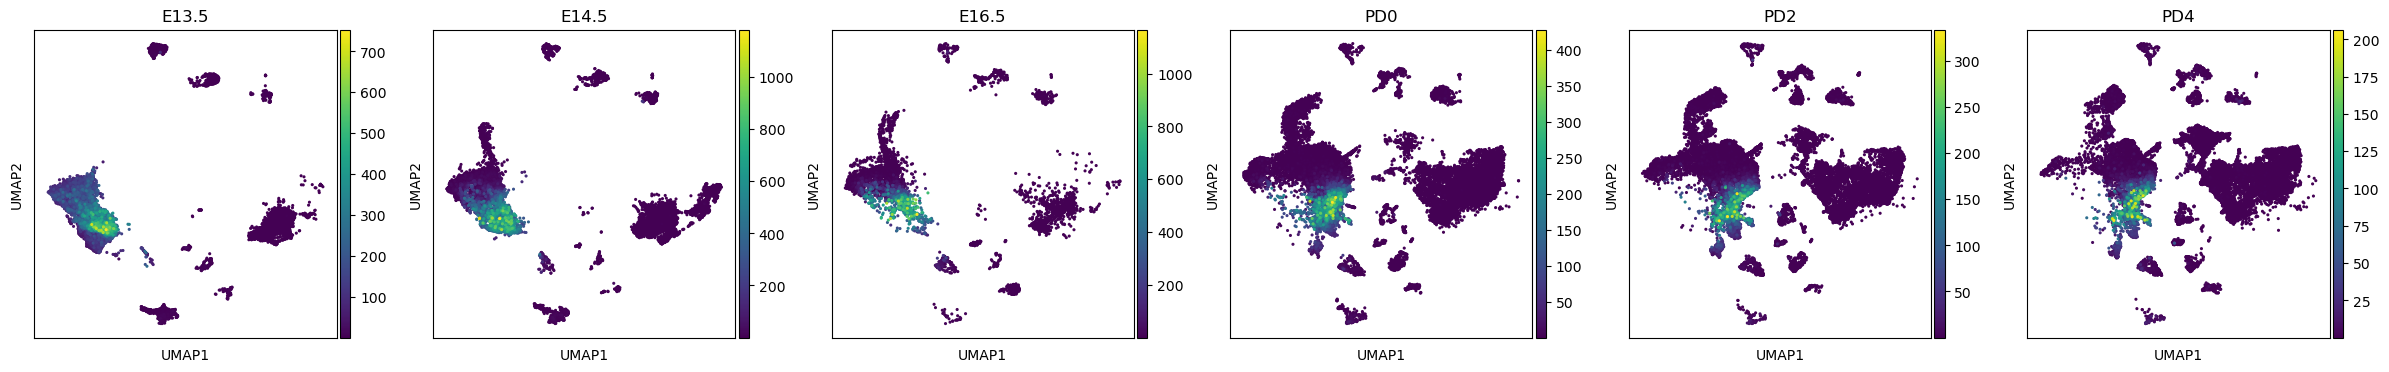

In [61]:
cluster_gene_multiples_normalized(adata, "Agtr2")

## scvi de_df

In [5]:
adata = sc.read("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221219.adata.e13_pd4.scviintegrated.LABELED.hvg5500.seed16.min_dist0.4.gene1000.mt7.5.h5ad")

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [6]:
vae = scvi.model.SCVI.load("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221208.E13-PD4.hvg5500.seed16.model", adata=adata, use_gpu=True)

INFO     File /data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221208.E13-P
         D4.hvg5500.seed16.model/model.pt already downloaded                                 


/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [7]:
de_df = vae.differential_expression(
    groupby="sub_cluster",
)
de_df.head()

DE...: 100%|██████████| 35/35 [09:38<00:00, 16.53s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Stfa3,0.9928,0.0072,4.926447,0.011948,0.001678,0.0,0.25,9.862435,10.249376,5.413208,...,50.305916,10.398706,0.943546,0.173077,120.662448,16.513596,True,BK-1 vs Rest,BK-1,Rest
Gdpd2,0.9918,0.0082,4.795386,0.000100,0.000006,0.0,0.25,5.831073,6.132261,2.832557,...,0.442796,0.028637,0.293128,0.022451,1.061910,0.060824,True,BK-1 vs Rest,BK-1,Rest
Calm5,0.9908,0.0092,4.679308,0.000020,0.000004,0.0,0.25,6.453127,6.800662,3.796039,...,0.081435,0.022694,0.063945,0.014509,0.198387,0.036932,True,BK-1 vs Rest,BK-1,Rest
Pglyrp4,0.9908,0.0092,4.679308,0.000070,0.000006,0.0,0.25,7.525874,7.775364,3.714757,...,0.241932,0.023868,0.174900,0.017152,0.584907,0.047906,True,BK-1 vs Rest,BK-1,Rest
Cstdc6,0.9906,0.0094,4.657600,0.000024,0.000004,0.0,0.25,5.842301,6.120944,3.329599,...,0.153285,0.032690,0.113777,0.020763,0.332730,0.053502,True,BK-1 vs Rest,BK-1,Rest


In [8]:
de_df.to_csv("230129.scvi_de_df_compare_to_entire.csv")

In [9]:
markers = {}
cats = adata.obs["sub_cluster"].cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers[c] = cell_type_df.index.tolist()[:2]

In [10]:
markers10 = {}
cats = adata.obs["sub_cluster"].cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers10[c] = cell_type_df.index.tolist()[:10]

In [11]:
markers

{'BK-1': ['Stfa3', 'Gdpd2'],
 'emFIB-2': ['Crabp1', 'Nrgn'],
 'FIB-1': ['Foxd1', 'Sost'],
 'FIB-2': ['Dusp26', 'Grem1'],
 'emFIB-3': ['2700069I18Rik', 'Npas3'],
 'FIB-3': ['Thbs2', 'C1qtnf3'],
 'emFIB-1': ['Mxd3', 'Sapcd2'],
 'BK-2': ['Ube2c', 'Krt17'],
 'FIB-4': ['Clec3b', 'Chrdl1'],
 'emBK': ['Nr2e3', 'Gjb6'],
 'DC/DP': ['Hes5', 'Prokr2'],
 'DP': ['Ncoa7', 'Scube3'],
 'HFKC-1': ['Krtap17-1', 'Lhx2'],
 'HFKC-2': ['Krt27', 'Dlx3'],
 'SBK-1': ['Krt1', 'Serpinb12'],
 'HFKC-3': ['Sftpc', 'Gjb4'],
 'Mast cells': ['Cma2', 'Il1rl1'],
 'Macrophage-1': ['Fpr2', 'Clec4d'],
 'Muscle cells': ['Cep41', 'Tnnt1'],
 'emFIB-4': ['Mkx', 'Six1'],
 'Pericytes': ['Gucy1a1', 'Cox4i2'],
 'emSBK': ['Ceacam19', 'Prr15l'],
 'Schwann cells': ['Mpz', 'Gm12688'],
 'Melanocytes': ['Xrra1', 'Mcoln3'],
 'Lymphocytes': ['Txk', 'Klra5'],
 'DS-2': ['Dlx6', '1520401A03Rik'],
 'DS-1': ['Amhr2', 'Btla'],
 'Vas-1': ['Gpihbp1', 'Tmem88'],
 'Macrophage-2': ['Xlr', 'Zmynd15'],
 'APM': ['Actg2', 'Slitrk3'],
 'HFKC-4': ['Stfa3'

In [12]:
markers10

{'BK-1': ['Stfa3',
  'Gdpd2',
  'Pglyrp4',
  'Cstdc6',
  'Csta1',
  'Stfa1',
  'Ly6d',
  'Cstdc5',
  'Skint1',
  'Clca3a2'],
 'emFIB-2': ['Crabp1',
  'Nrgn',
  'Dkk1',
  'Sfrp5',
  'Sp5',
  'Apela',
  'Lrrc32',
  'Lix1',
  'Ngfr',
  'Agtr2'],
 'FIB-1': ['Foxd1',
  'Sost',
  'Pde2a',
  'Lamc3',
  'Ndnf',
  '2600014E21Rik',
  'Sox18',
  'Slc26a7',
  'Lrrc15',
  'Coch'],
 'FIB-2': ['Dusp26',
  'Grem1',
  'Ccdc42',
  'Fgfr4',
  'Enho',
  'Nat8l',
  'Dpp4',
  'Grem2',
  'Ndst3',
  'Insc'],
 'emFIB-3': ['2700069I18Rik',
  'Npas3',
  'Veph1',
  'Agtr2',
  'Cbln2',
  'Wnt2',
  'E330013P04Rik',
  'Dmrt2',
  'Epha3',
  'Gata6'],
 'FIB-3': ['Thbs2',
  'C1qtnf3',
  'Clec3b',
  'Dpep1',
  'Scg3',
  'Ltbp2',
  'Rbp4',
  'Tnxb',
  'Creb3l3',
  'Gria4'],
 'emFIB-1': ['Mxd3',
  'Sapcd2',
  'Arhgef39',
  'Pimreg',
  'Aspm',
  'Ube2c',
  'Prc1',
  'Sgo2a',
  'Depdc1a',
  'Troap'],
 'BK-2': ['Ube2c',
  'Krt17',
  'Cenpf',
  'Hist1h2af',
  'Sapcd2',
  'Cdc20',
  'Aspm',
  'Clca3a2',
  'Stfa3',
  'Calm4'],


## Hierarchical dendrogram

In [13]:
sc.tl.dendrogram(adata, groupby="sub_cluster", use_rep="X_scVI")

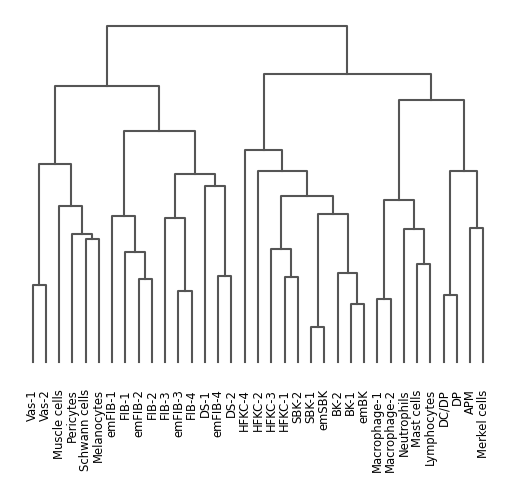

In [14]:
ax = sc.pl.dendrogram(adata, 'sub_cluster', save='dendrogram.pdf')

## Stacked violin plot

In [15]:
marker_genes_dict = {'Upper embryonic fibroblast':["Twist2", "Crabp1"], "Lower embryonic fibroblast":["Dlk1"], "Papillary fibroblast":["Entpd1", "Dpp4"],
                     "Reticular fibroblast":["Dlk1", "Ly6a"], "Hypodermal fibroblast":["Cxcl12", "Gpx3"], "Fascia fibroblast":["Mfap5", "Clec3b"], 'Dermal condensate/Newborn dermal papilla':["Sox18", "Bmp4", "Cxcr4", "Sdc1"],
                     'Dermal papilla':["Corin", "Alpl", "Vcan", "Alx4"], 'Dermal sheath':["Cd200", "Col11a1","Acan","Abi3bp"], 'Arrector pili muscle':["Actg2", "Itga8"]}

In [16]:
adata_dermis = adata[adata.obs['sub_cluster'].isin(['emFIB-1', 'emFIB-2', 'emFIB-3', 'emFIB-4', 'FIB-1', 'FIB-2', 'FIB-3', 'FIB-4', 'DC/DP', 'DP', 'DS-1', 'DS-2', 'APM'])]

In [17]:
#https://scanpy.discourse.group/t/how-to-order-legend-in-sc-pl-umap/411
adata_dermis.obs['sub_cluster'].cat.reorder_categories(['emFIB-1', 'emFIB-2', 'emFIB-3', 'emFIB-4', 'FIB-1', 'FIB-2', 'FIB-3', 'FIB-4', 'DC/DP', 'DP', 'DS-1', 'DS-2', 'APM'], inplace=True)

/tmp/ipykernel_86410/2545622941.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_dermis.obs['sub_cluster'].cat.reorder_categories(['emFIB-1', 'emFIB-2', 'emFIB-3', 'emFIB-4', 'FIB-1', 'FIB-2', 'FIB-3', 'FIB-4', 'DC/DP', 'DP', 'DS-1', 'DS-2', 'APM'], inplace=True)


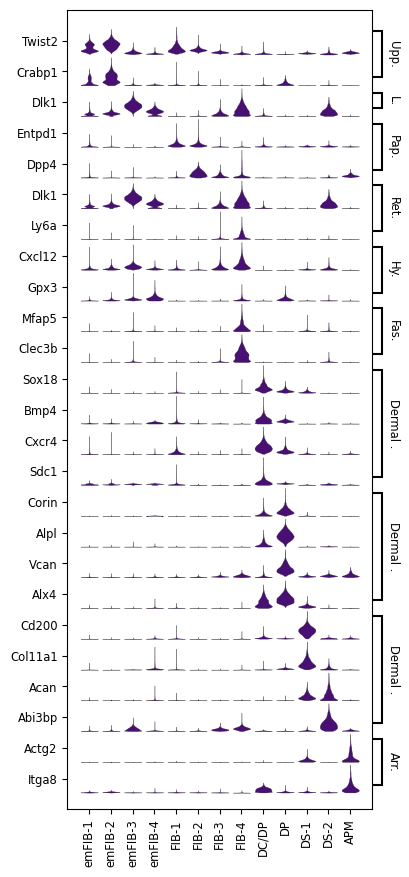

In [18]:
ax = sc.pl.stacked_violin(adata_dermis, marker_genes_dict, layer='scvi_normalized',
                          figsize=(6,10), row_palette='indigo', var_group_rotation=False,
                     swap_axes=True, dpi=1000,
                          groupby='sub_cluster', save=("230129.stackedviolin.dermis.pdf"))

In [19]:
marker_genes_dict = {'Embryonic suprabasal keratinocyte':['Krtdap', 'Dmkn', 'Sbsn'], 'Embryonic Basal keratinocyte':['Krt19', 'Sostdc1'], 'Suprabasal keratinocyte':['Krt10', 'Krt1'], 'Upper spinous layer':["Krt24"], 'Basal keratinocyte':['Krt14', 'Krt5'], 'Hair outer layer':['Barx2', 'Il11ra1'], 'Hair inner layer':["Msx2"], 'Hair upper companion layer':['Sostdc1', 'Apoe'], 'Hair follicle stem cell':["Cd34", "Itga6"],                    }

In [20]:
adata_epidermis = adata[adata.obs['sub_cluster'].isin(['emSBK', 'emBK', 'SBK-1', 'SBK-2', 'BK-1', 'BK-2', 'HFKC-1', 'HFKC-2', 'HFKC-3', 'HFKC-4'])]

In [21]:
#https://scanpy.discourse.group/t/how-to-order-legend-in-sc-pl-umap/411
adata_epidermis.obs['sub_cluster'].cat.reorder_categories(['emSBK', 'emBK', 'SBK-1', 'SBK-2', 'BK-1', 'BK-2', 'HFKC-1', 'HFKC-2', 'HFKC-3', 'HFKC-4'], inplace=True)

/tmp/ipykernel_86410/1671888216.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_epidermis.obs['sub_cluster'].cat.reorder_categories(['emSBK', 'emBK', 'SBK-1', 'SBK-2', 'BK-1', 'BK-2', 'HFKC-1', 'HFKC-2', 'HFKC-3', 'HFKC-4'], inplace=True)


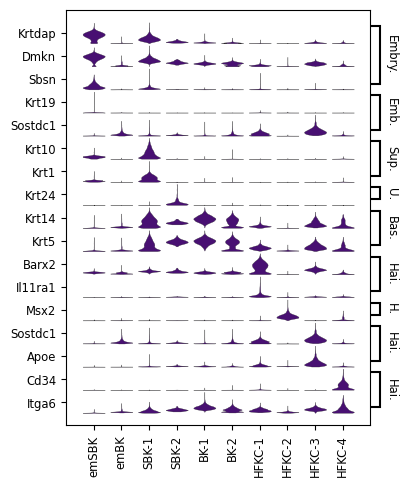

In [22]:
ax = sc.pl.stacked_violin(adata_epidermis, marker_genes_dict, layer='scvi_normalized',
                          figsize=(6,5), row_palette='indigo', var_group_rotation=False,
                     swap_axes=True, dpi=1000,
                          groupby='sub_cluster', save=("230129.stackedviolin.epidermis.pdf"))

In [23]:
marker_genes_dict = {'Schwann cell':['Sox10'], 'Melanocyte':['Dct', 'Tyr'], 'Pericyte':['Rgs5'], 'Muscle cell':['Msc', 'Ttn', 'Pax7'], 'Merkel cell':['Krt20', 'Krt8'], 'Vasculature':['Pecam1', 'Cdh5'], 'Lymphocyte':['Cd3g', 'Cd19', 'Ms4a1'], 'Macrophage':['Cd86', 'Mrc1'], 'Mast cell':['Cpa3', 'Mcpt4', 'Cma2'], 'Neutrophil':['Cd177', 'Cxcr2'],       }

In [24]:
adata_rest = adata[adata.obs['sub_cluster'].isin(['Schwann cells', 'Melanocytes', 'Pericytes', 'Muscle cells', 'Merkel cells', 'Vas-1', 'Vas-2', 'Lymphocytes', 'Macrophage-1', 'Macrophage-2', 'Mast cells', 'Neutrophils'])]

In [25]:
#https://scanpy.discourse.group/t/how-to-order-legend-in-sc-pl-umap/411
adata_rest.obs['sub_cluster'].cat.reorder_categories(['Schwann cells', 'Melanocytes', 'Pericytes', 'Muscle cells', 'Merkel cells', 'Vas-1', 'Vas-2', 'Lymphocytes', 'Macrophage-1', 'Macrophage-2', 'Mast cells', 'Neutrophils'], inplace=True)

/tmp/ipykernel_86410/3106393049.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_rest.obs['sub_cluster'].cat.reorder_categories(['Schwann cells', 'Melanocytes', 'Pericytes', 'Muscle cells', 'Merkel cells', 'Vas-1', 'Vas-2', 'Lymphocytes', 'Macrophage-1', 'Macrophage-2', 'Mast cells', 'Neutrophils'], inplace=True)


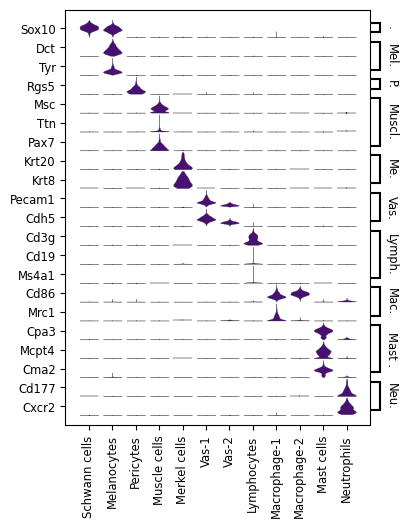

In [26]:
ax = sc.pl.stacked_violin(adata_rest, marker_genes_dict, layer='scvi_normalized',
                          figsize=(6,5), row_palette='indigo', var_group_rotation=False,
                     swap_axes=True, dpi=1000,
                          groupby='sub_cluster', save=("230129.stackedviolin.rest.pdf"))

## Dotplot

In [27]:
markers = {'APM': ['Actg2', 'Slitrk3'], 'BK-1': ['Stfa3', 'Gdpd2'], 'BK-2': ['Ube2c', 'Krt17'], 'DC/DP': ['Hes5', 'Prokr2'],
 'DP': ['Ncoa7', 'Scube3'], 'DS-1': ['Amhr2', 'Btla'], 'DS-2': ['Dlx6', '1520401A03Rik'],
 'FIB-1': ['Foxd1', 'Sost'],
 'FIB-2': ['Dusp26', 'Grem1'],
 'FIB-3': ['Thbs2', 'C1qtnf3'],
 'FIB-4': ['Clec3b', 'Chrdl1'],          
 'HFKC-1': ['Krtap17-1', 'Lhx2'],
 'HFKC-2': ['Krt27', 'Dlx3'],     
 'HFKC-3': ['Sftpc', 'Gjb4'],        
 'HFKC-4': ['Stfa3', 'Mcpt4'],       
 'Lymphocytes': ['Txk', 'Klra5'],
 'Macrophage-1': ['Fpr2', 'Clec4d'],
 'Macrophage-2': ['Xlr', 'Zmynd15'],
 'Mast cells': ['Cma2', 'Il1rl1'],
 'Melanocytes': ['Xrra1', 'Mcoln3'],
 'Merkel cells': ['Igfbpl1', 'R3hdml'],
 'Muscle cells': ['Cep41', 'Tnnt1'],
 'Neutrophils': ['S100a8', 'Acod1'],
 'Pericytes': ['Gucy1a1', 'Cox4i2'],
 'SBK-1': ['Krt1', 'Serpinb12'],
 'SBK-2': ['Krt24', 'Myh4'],
 'Schwann cells': ['Mpz', 'Gm12688'],
 'Vas-1': ['Gpihbp1', 'Tmem88'],
 'Vas-2': ['Mmrn1', 'C130074G19Rik'],
 'emBK': ['Nr2e3', 'Gjb6'],
 'emFIB-1': ['Mxd3', 'Sapcd2'],
 'emFIB-2': ['Crabp1', 'Nrgn'],
 'emFIB-3': ['2700069I18Rik', 'Npas3'],
 'emFIB-4': ['Mkx', 'Six1'],
 'emSBK': ['Ceacam19', 'Prr15l']}

In [28]:
adata.obs["sub_cluster"] = (
    adata.obs["sub_cluster"]
    .cat.reorder_categories(
        sorted(adata.obs["sub_cluster"].cat.categories)
    )
)

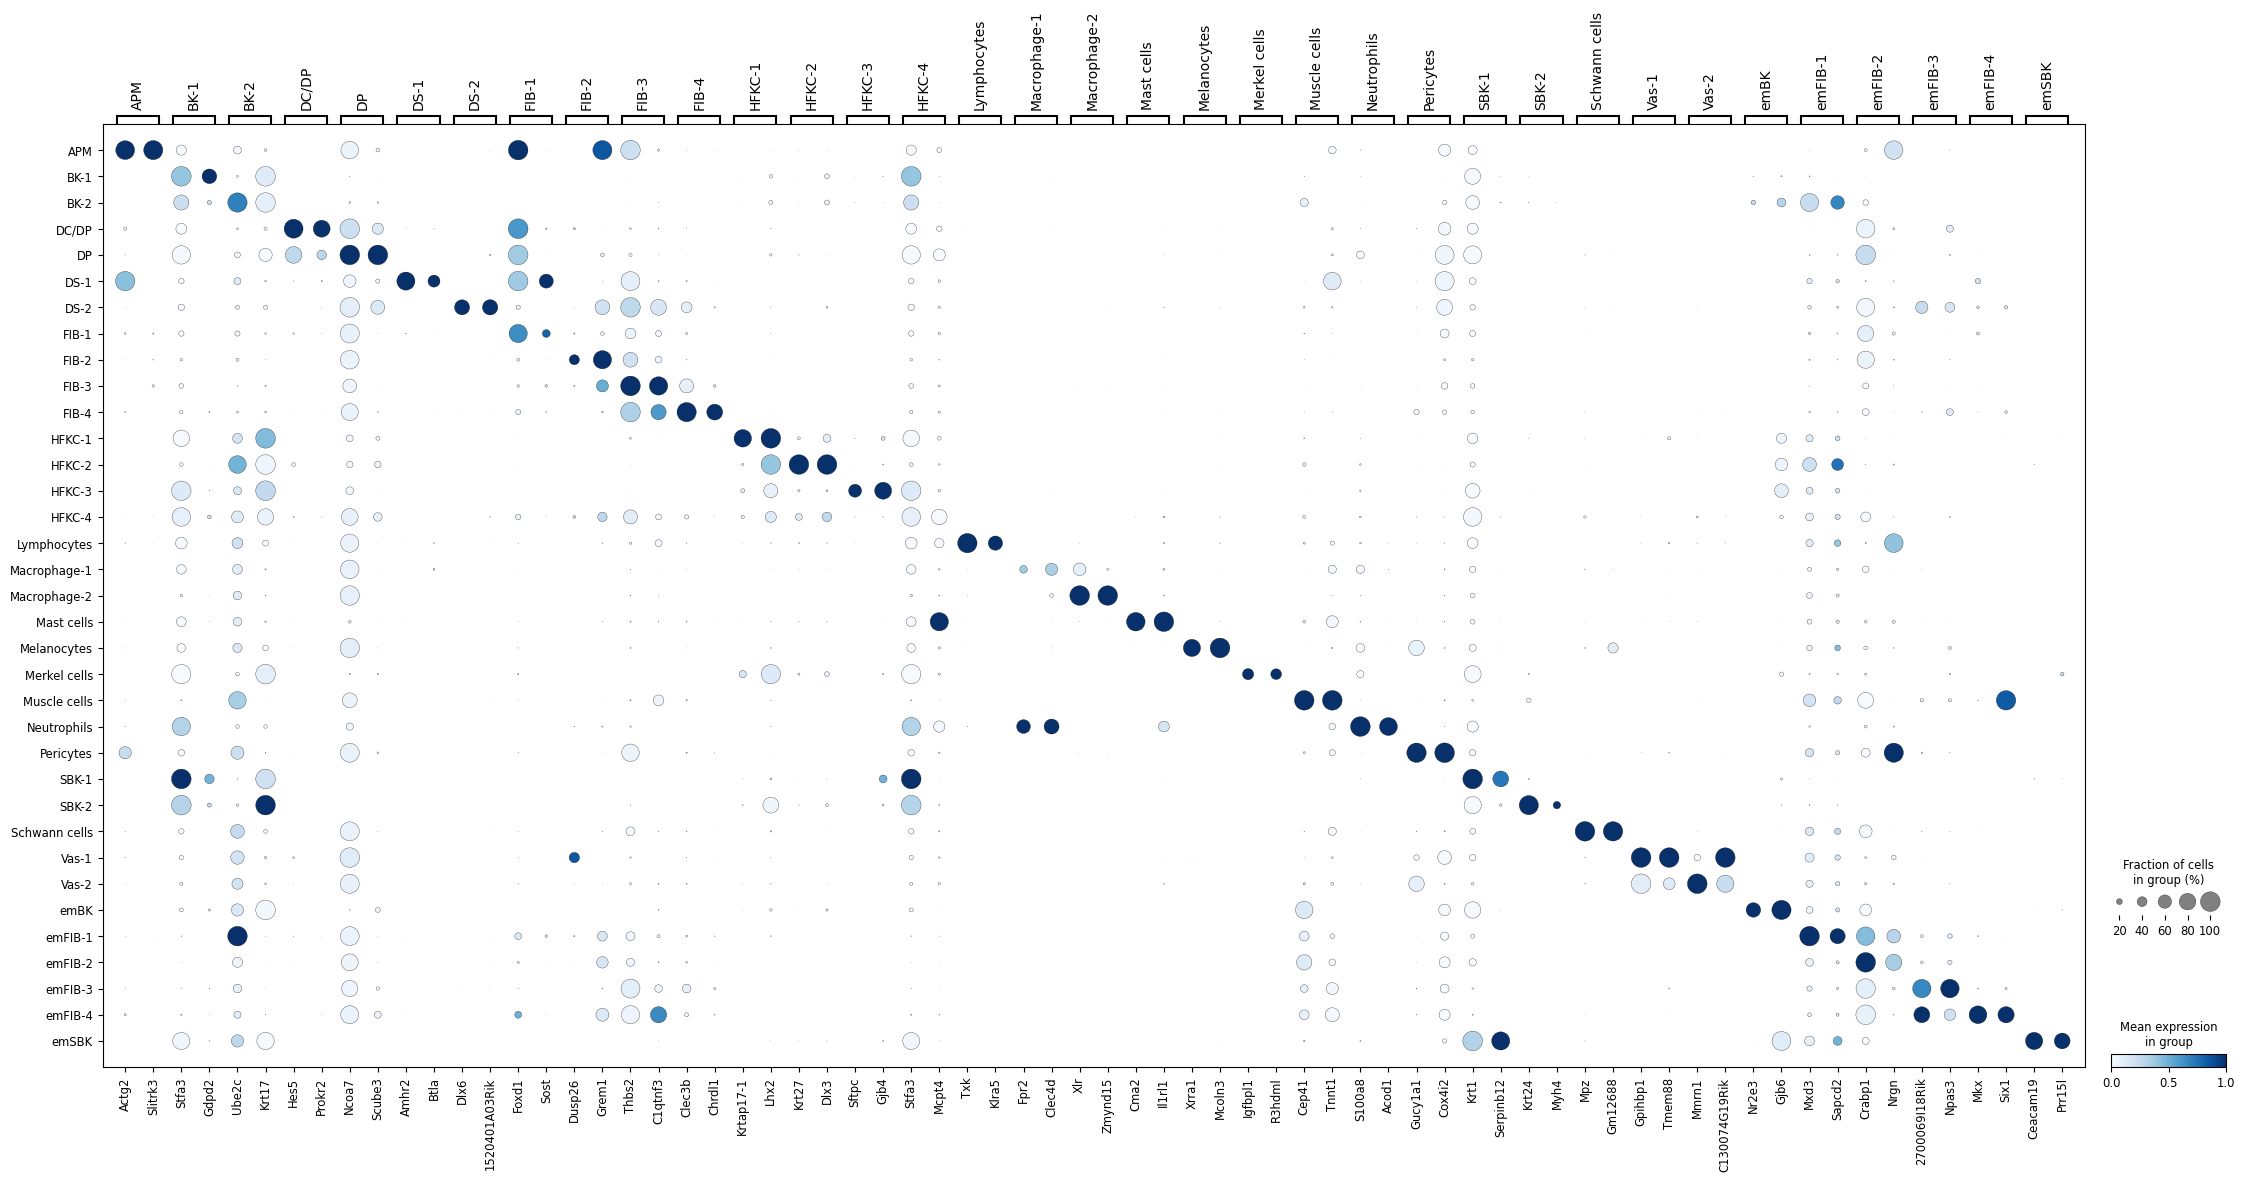

In [29]:
sc.pl.dotplot(
    adata,
    markers,
    groupby='sub_cluster',
    dendrogram=False,
    color_map="Blues",
    swap_axes=False,
    use_raw=False,
    standard_scale="var", layer = "scvi_normalized", expression_cutoff=5, save='230129.dot.top2genes.pdf'
)